In [1]:
from __future__ import print_function, division
import os
import sys 

spark_home = os.environ['SPARK_HOME']
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.4-src.zip'))

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local") \
   .appName("test") \
   .enableHiveSupport() \
   .getOrCreate()

sc = spark.sparkContext

In [33]:
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors
import numpy as np

In [35]:
#!hadoop fs -put ../data/ratings_full.csv /data/

In [36]:
data = spark.read.csv("/data/ratings_full.csv", header= True)

In [37]:
sample_data = data.sample(False, 0.001, 1)

In [39]:
sample_data

DataFrame[userId: string, movieId: string, rating: string, timestamp: string]

In [40]:
sample_data.count()

19976

In [6]:
dense_data = sample_data.rdd.map(lambda x: Vectors.dense(x))

In [7]:
dense_data.take(5)

[DenseVector([4.0, 153.0, 5.0, 844416699.0])]

In [8]:
#http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#module-pyspark.mllib.stat
summary = Statistics.colStats(dense_data)


In [9]:
summary.max()[2]

5.0

In [12]:
print("Duration Statistics:")
print(" Mean: {}".format(round(summary.mean()[2],3)))
print(" St. deviation: {}".format(round(np.sqrt(summary.variance()[2]),3)))
print(" Max value: {}".format(round(summary.max()[2],3)))
print(" Min value: {}".format(round(summary.min()[2],3)))
print(" Total value count: {}".format(summary.count()))
print(" Number of non-zero values: {}".format(summary.numNonzeros()[2]))

Duration Statistics:
 Mean: 5.0
 St. deviation: 0.0
 Max value: 5.0
 Min value: 5.0
 Total value count: 1
 Number of non-zero values: 1.0


In [17]:
#!pip3.6 install pandas seaborn matplotlib

In [41]:
import pandas as pd
import seaborn as sns
sample_data_pd = sample_data.toPandas()

In [38]:
sample_data_pd.head()

,userid,movieid,rating,ts
0,4,153,5,844416699


In [42]:
type(sample_data_pd)

pandas.core.frame.DataFrame

In [43]:
sample_data_pd.dtypes

userId       object
movieId      object
rating       object
timestamp    object
dtype: object

In [44]:
%matplotlib inline

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


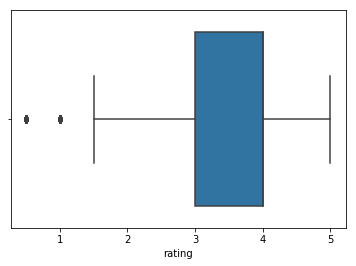

In [45]:
sns.boxplot(x=sample_data_pd['rating'].convert_objects(convert_numeric=True))

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


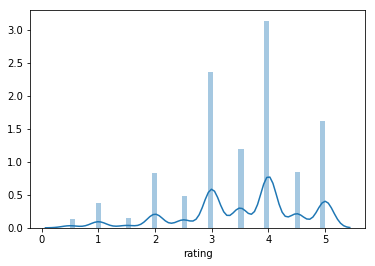

In [46]:
sns.distplot(sample_data_pd['rating'].convert_objects(convert_numeric=True))

In [53]:
means = []

for i in range(10):
    mean = sample_data_pd['rating'].sample(frac=0.1).convert_objects(convert_numeric=True).mean(axis=0)
    means.append(mean)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [54]:
means[:10]

[3.499249249249249,
 3.4924924924924925,
 3.5485485485485486,
 3.527027027027027,
 3.54029029029029,
 3.5382882882882885,
 3.5382882882882885,
 3.574324324324324,
 3.5337837837837838,
 3.5075075075075075]

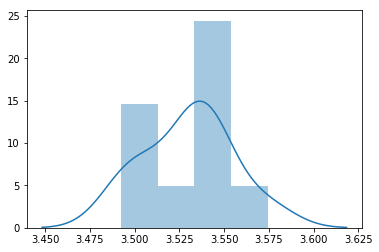

In [55]:
sns.distplot(means)

In [ ]:
spark.stop()